<a href="https://colab.research.google.com/github/ivaibhavi17/Machine-Learning/blob/main/05_Random_Forest_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

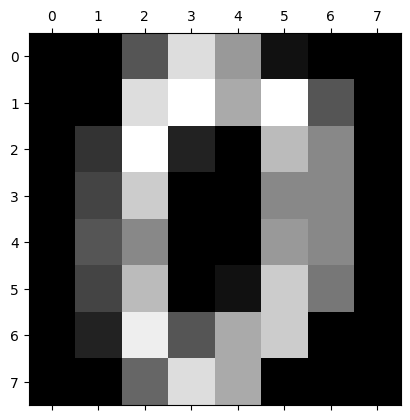

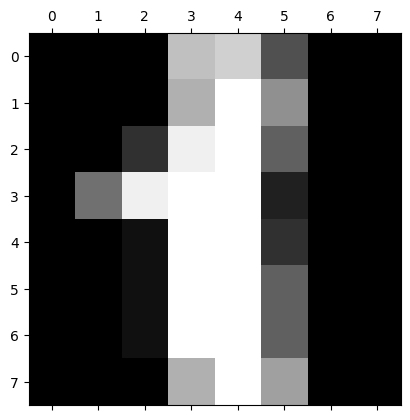

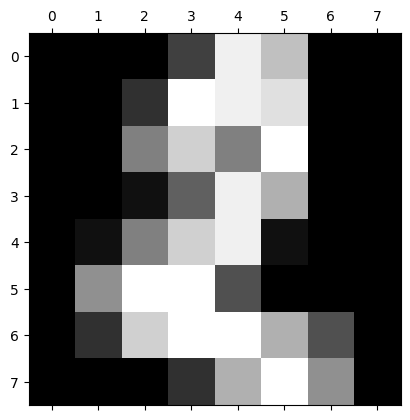

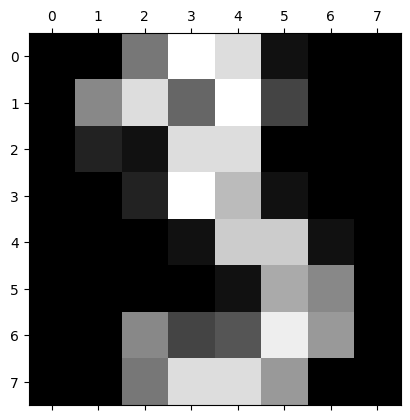

In [17]:
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [19]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [22]:
digits.target[:4]

array([0, 1, 2, 3])

In [24]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [26]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [28]:
x=df.drop('target',axis='columns')
x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [33]:
y=df.target
y

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
len(x_train)

1437

In [38]:
len(x_test)

360

In [40]:
len(x)

1797

In [42]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [43]:
model.score(x_test,y_test)

0.9777777777777777

In [48]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
561,0.0,0.0,1.0,10.0,15.0,10.0,0.0,0.0,0.0,1.0,...,16.0,0.0,0.0,0.0,2.0,11.0,15.0,16.0,12.0,0.0
1386,0.0,0.0,2.0,16.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,15.0,13.0,0.0,0.0,0.0
933,0.0,0.0,10.0,14.0,10.0,1.0,0.0,0.0,0.0,4.0,...,7.0,0.0,0.0,0.0,12.0,16.0,15.0,8.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
24,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.0,0.0,2.0,11.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,16.0,12.0,1.0,0.0,0.0
457,0.0,0.0,4.0,12.0,16.0,16.0,11.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,14.0,13.0,1.0,0.0,0.0
122,0.0,0.0,3.0,6.0,14.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,15.0,14.0,0.0,0.0,0.0
149,0.0,0.0,6.0,13.0,10.0,4.0,0.0,0.0,0.0,4.0,...,8.0,0.0,0.0,0.0,7.0,16.0,14.0,9.0,1.0,0.0


In [50]:
y_predicted = model.predict(x_test)
y_predicted

array([3, 1, 8, 0, 4, 1, 0, 8, 2, 6, 3, 6, 0, 0, 2, 6, 9, 6, 8, 4, 0, 8,
       5, 0, 4, 1, 0, 0, 5, 3, 9, 5, 5, 3, 3, 4, 5, 8, 2, 2, 0, 7, 0, 5,
       3, 1, 0, 9, 9, 2, 3, 7, 2, 6, 4, 1, 1, 5, 7, 6, 9, 4, 0, 3, 4, 3,
       1, 3, 7, 5, 5, 6, 6, 8, 1, 8, 1, 9, 5, 0, 9, 7, 9, 6, 5, 3, 6, 7,
       7, 6, 7, 3, 3, 3, 7, 6, 3, 5, 8, 2, 7, 6, 6, 5, 9, 2, 1, 9, 6, 9,
       7, 1, 1, 5, 1, 4, 1, 0, 9, 7, 4, 6, 5, 3, 2, 9, 2, 0, 8, 7, 9, 7,
       4, 0, 2, 2, 0, 4, 5, 7, 9, 8, 3, 6, 7, 8, 5, 6, 4, 9, 6, 5, 8, 3,
       6, 0, 4, 4, 7, 4, 9, 7, 3, 8, 6, 6, 1, 0, 5, 9, 1, 7, 0, 9, 3, 6,
       9, 1, 9, 1, 2, 8, 0, 5, 3, 5, 4, 0, 6, 1, 4, 5, 2, 0, 4, 7, 5, 9,
       6, 0, 4, 3, 9, 7, 1, 4, 3, 1, 5, 4, 8, 6, 1, 0, 0, 8, 5, 3, 2, 2,
       6, 1, 3, 5, 2, 8, 0, 1, 2, 3, 3, 8, 7, 3, 8, 5, 2, 7, 9, 5, 6, 4,
       7, 2, 8, 3, 3, 0, 8, 4, 0, 7, 4, 3, 7, 8, 2, 0, 4, 0, 4, 2, 4, 1,
       1, 2, 8, 4, 1, 7, 9, 7, 1, 3, 8, 5, 3, 0, 0, 7, 4, 3, 4, 2, 7, 0,
       0, 0, 6, 6, 4, 0, 7, 3, 3, 9, 2, 8, 2, 6, 6,

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[42,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 25,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 38]])

Text(95.72222222222221, 0.5, 'Truth')

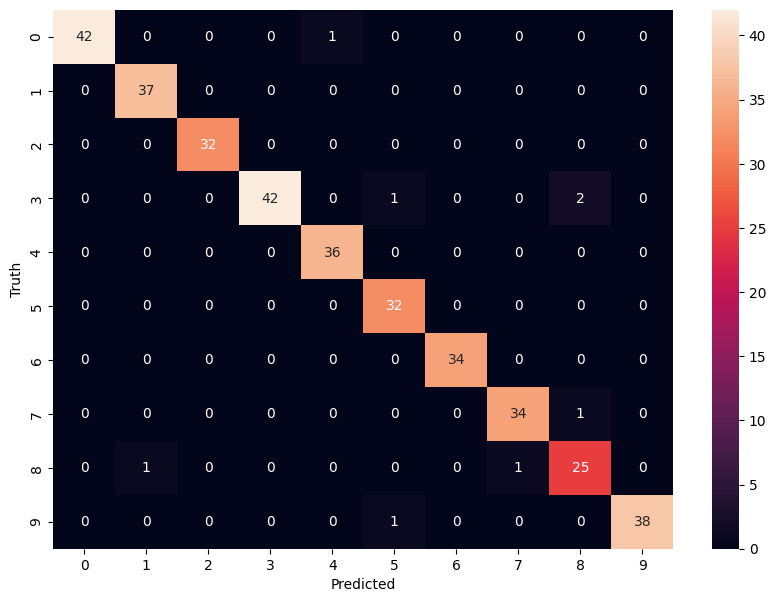

In [53]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')